In [1]:
import csv, re, random
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics

In [2]:
# pd.set_option('display.max_columns', None)  # or 1000
# pd.set_option('display.max_rows', None)  # or 1000
# pd.set_option('display.max_colwidth', None)  # or 199

# Read CSVs --> df_2010to2020

In [3]:
df_au = pd.read_csv('AU_domestic_Ngram_stopword_lematize.csv', usecols=['article_text_Ngram_stopword_lemmatize'])
print("finished reading au")
df_bd = pd.read_csv('BD_domestic_Ngram_stopword_lematize.csv', usecols=['article_text_Ngram_stopword_lemmatize'])
print("finished reading bd")
df_ca = pd.read_csv('CA_domestic_Ngram_stopword_lematize.csv', usecols=['article_text_Ngram_stopword_lemmatize'])
print("finished reading ca")
df_gb = pd.read_csv('GB_domestic_Ngram_stopword_lematize.csv', usecols=['article_text_Ngram_stopword_lemmatize'])
print("finished reading gb")
df_gh = pd.read_csv('GH_domestic_Ngram_stopword_lematize.csv', usecols=['article_text_Ngram_stopword_lemmatize'])
print("finished reading gh")
df_hk = pd.read_csv('HK_domestic_Ngram_stopword_lematize.csv', usecols=['article_text_Ngram_stopword_lemmatize'])
print("finished reading hk")
df_ie = pd.read_csv('IE_domestic_Ngram_stopword_lematize.csv', usecols=['article_text_Ngram_stopword_lemmatize'])
print("finished reading ie")
df_in = pd.read_csv('IN_domestic_Ngram_stopword_lematize.csv', usecols=['article_text_Ngram_stopword_lemmatize'])
print("finished reading in")
df_jm = pd.read_csv('JM_domestic_Ngram_stopword_lematize.csv', usecols=['article_text_Ngram_stopword_lemmatize'])
print("finished reading jm")
df_ke = pd.read_csv('KE_domestic_Ngram_stopword_lematize.csv', usecols=['article_text_Ngram_stopword_lemmatize'])
print("finished reading ke")
df_lk = pd.read_csv('LK_domestic_Ngram_stopword_lematize.csv', usecols=['article_text_Ngram_stopword_lemmatize'])
print("finished reading lk")
df_my = pd.read_csv('MY_domestic_Ngram_stopword_lematize.csv', usecols=['article_text_Ngram_stopword_lemmatize'])
print("finished reading my")
df_ng = pd.read_csv('NG_domestic_Ngram_stopword_lematize.csv', usecols=['article_text_Ngram_stopword_lemmatize'])
print("finished reading ng")
df_nz = pd.read_csv('NZ_domestic_Ngram_stopword_lematize.csv', usecols=['article_text_Ngram_stopword_lemmatize'])
print("finished reading nz")
df_ph = pd.read_csv('PH_domestic_Ngram_stopword_lematize.csv', usecols=['article_text_Ngram_stopword_lemmatize'])
print("finished reading ph")
# df_pk = pd.read_csv('PK_domestic_Ngram_stopword_lematize.csv', usecols=['article_text_Ngram_stopword_lemmatize'])
# print("finished reading pk")
df_sg = pd.read_csv('SG_domestic_Ngram_stopword_lematize.csv', usecols=['article_text_Ngram_stopword_lemmatize'])
print("finished reading sg")
df_tz = pd.read_csv('TZ_domestic_Ngram_stopword_lematize.csv', usecols=['article_text_Ngram_stopword_lemmatize'])
print("finished reading tz")
df_us = pd.read_csv('US_domestic_Ngram_stopword_lematize.csv', usecols=['article_text_Ngram_stopword_lemmatize'])
print("finished reading us")
# df_za = pd.read_csv('ZA_domestic_Ngram_stopword_lematize.csv', usecols=['article_text_Ngram_stopword_lemmatize'])
# print("finished reading za")

finished reading au
finished reading bd
finished reading ca
finished reading gb
finished reading gh
finished reading hk
finished reading ie
finished reading in
finished reading jm
finished reading ke
finished reading lk
finished reading my
finished reading ng
finished reading nz
finished reading ph
finished reading sg
finished reading tz
finished reading us


In [4]:
df_au

,article_text_Ngram_stopword_lemmatize
0,Labor continue pursuit Angus Taylor Federal La...
1,For many year South Australia unenviable reput...
2,Jamie Maclaren open join Melbourne City tough ...
3,Perth man hang arm drug gang Rio favela Topics...
4,MP allegedly told fake donor lie ICAC Dominica...
...,...
62679,The late move stop agreement extension exist c...
62680,Western Australia second win Saturday beating ...
62681,Chiropractor jail kidnap plot built crematoriu...
62682,So collect five six encampment yesterday aband...


In [5]:
# concate to make all countries show in one big table
# missing pk & za

df_2010to2020 = pd.concat([df_au,df_bd,df_ca,df_gb,df_gh,df_hk,df_ie,df_in,df_jm,df_ke,df_lk,df_my,df_ng,df_nz,df_ph,df_sg,df_tz,df_us], axis=1)
df_2010to2020.columns = ['txtfiles_au','txtfiles_bd','txtfiles_ca','txtfiles_gb','txtfiles_gh','txtfiles_hk',
                         'txtfiles_ie','txtfiles_in','txtfiles_jm','txtfiles_ke','txtfiles_lk','txtfiles_my',
                         'txtfiles_ng','txtfiles_nz','txtfiles_ph','txtfiles_sg','txtfiles_tz','txtfiles_us']

In [6]:
df_2010to2020

,txtfiles_au,txtfiles_bd,txtfiles_ca,txtfiles_gb,txtfiles_gh,txtfiles_hk,txtfiles_ie,txtfiles_in,txtfiles_jm,txtfiles_ke,txtfiles_lk,txtfiles_my,txtfiles_ng,txtfiles_nz,txtfiles_ph,txtfiles_sg,txtfiles_tz,txtfiles_us
0,Labor continue pursuit Angus Taylor Federal La...,Chittagong division follow leader neck neck co...,The province distribute new category legal non...,Owner Paul Harris delighted A tower landmark u...,ACCA hold first Virtual Career amp Job Fair Th...,NEWS Lodro Rinzler second senior Shambhala tea...,Why smoking destroys skin Fashion.ie Irish fas...,Ramachandra Guha 's new collection essay acqui...,Colah hit chart Up Up Up Reggae singer Colah C...,brother uncle brand sponsor Numerous story tol...,AIA Insurance 's Higher Education Scholarships...,While world set sight virtual reality VR Apple...,EFCC Grills Zamfara INEC Officials Diversion N...,Secret photo available Nina search EYES IN THE...,Natinal Newsbits fr December 13 December 12 20...,Netflix 's dark comedy A Series Unfortunate Ev...,Is Koffi Olomide still undisputed King Rumba F...,Francis Culture Encounter All pope tend couple...
1,For many year South Australia unenviable reput...,BRAC win OFID annual award support Rohingyas U...,Ortis 47 charge three section Security Informa...,Keighley man convict park rape try snatch girl...,Vindictive Akufo Addo behind Mahama 's EOCO pe...,Lavinia Ideas fleeting likeair molecule flicks...,Celebrity Tom Holland found cast news online T...,Amish Tripathi author Shiva Triology criticise...,STUDENTS THREATENED FOR PARTY COLOURS File Pol...,Construction Outering road cause mixed fortune...,Tomorrow perhaps future EDITORIAL 06 Nov 2019 ...,"The Galaxy Note8 powerful smartphone 3,300mAh ...",Alleged N1.4bn Fraud How Usoro Paid N700m Witn...,Psoriasis study show need well care Relevant o...,120 B exprt target push back The Department f ...,Taiwanese bubble tea chain Playmade know make ...,Peace education poll dominate Easter message M...,Papabile Day The Men Who Could Be Pope John Al...
2,Jamie Maclaren open join Melbourne City tough ...,No ban BD worker recruitment Kuwait Shahriar T...,ATLANTA Republican Sen. Johnny Isakson 's anno...,Chancellor say impressive Silsden firm part na...,GCB wipe UT bank logo branch Rebranding head o...,Unnecessary Worry In darkness many ditch obsta...,Celebrity Why Chelsea Handler quit Netflix tal...,Mumbai Hospital performs two heart transplant ...,Spookie ready blaze Sting This year great one ...,Your lady say go girl 's night bro 's My young...,Shavendra 's promotion Worrying message victim...,If want go Full View Full Screen without burni...,Opinion Adesuwa Aruwa Capital Management A Chi...,Sameera Battelage always dream bring parent Ne...,Shell prepares mark 100 year December 19 These...,In mid July Build A Bear debut Pay Your Age de...,Latest Banking litigation Attachment asset exe...,We become God 's prophet love The first lesson...
3,Perth man hang arm drug gang Rio favela Topics...,Shakib Tamim Liton get big move T20I ranking D...,Powell River Aikikai self defence art peace in...,Children risk exposure adult material online w...,Armyworms defeat yet Suhuyini Farmers Tamale N...,Everything change thoughtsare sound move like ...,Celebrity Simon Cowell share thought One Direc...,You Indian Army conduct major military exercis...,D'Angel sign endorsement deal Self proclaim Fi...,Why understand youth Have ever situation mind ...,The Nayakkars make way Madurai Nayak dynasty f...,The Sony a6400 arrive For prefer use mirrorles...,Kidnappers NSCDC Officials Demand N6m Ransom K...,Those staunch southerner ca n't abide jibber j...,10 death 4 rad accident Nasugbu Batangas Seven...,Suicide main cause death millennials Singapore...,Dar e Salaam The Under 16 national basketball ...,The Independent News Source The paradox Pope F...
4,MP allegedly told fake donor lie ICAC Dominica...,The 22 year old Army shooter Khulna Shakil com...,President Cannabis NB say take time profitable...,Burglary force closur

# Function: Get Top 300 Words for Each Country

In [7]:
# input: country_serie (for example: df_2010to2020.txtfiles_au.dropna()).
# if not dropna(), error
# output: a list that consists of the most frequent 300 pairs (key: word + value: occurance times) for 2010to2020

def most300(country_serie):

    # create a dictionary. If key doesn't exist, set its value to be 0, otherwise its value + 1
    counts = {}
    for article in country_serie:
        words = article.lower().split()
        for word in words:
            counts[word] = counts.get(word, 0) + 1

    # pop all pairs in which keys are not words
    # keys_to_remove = [',' , '?' , '.' , ';' , '!', ':', '-', '--', '(', ')']
    # reference website https://www.ranks.nl/stopwords
    keys_to_remove = ['\'s','n\'t','\'re','\'ve','\'\'','\'m','\'ll','\'d','**33','/p','1','2','3','4','5','6','7','10','12','15','19',
                      '20','30','one','six','a','able','across','act','all','almost','along','already','also','among','and',
                      'another','around','as','ask','at','away','back','become','but','by','ca','cause','co','could','come',
                      'd','do','due','e','end','enough','even','ever','every','f','ff','first','five','for','found','four',
                      'g','get','give','go','home','however','if','in','instead','it','keep','know','last','least',
                      'less','let','like','likely','line','look','make','many','may','mean','might','mr','mr.','much','must',
                      'n','name','need','next','no','now','old','on','others','our','p','part','past','per','put','r',
                      'really','recent','s','second','say','see','seem','show','since','so','someone','still','sure',
                      't','take','that','the','there','they','third','though','told','try','two','u','yet','tell','this',
                      'three','to','want','way','what','when','whether','while','with','within','without','would']
    for key in keys_to_remove:
        counts.pop(key, None)

    # use tuple to exchange key and value
    lst = list()
    for key, val in counts.items():
        newtup = (val, key)
        lst.append(newtup)

    # sort by value in pair and get the most 300
    # sortedLst contains tuples (val, key)
    sortedLst = sorted(lst, reverse=True)[:300]
    
    # exchange key and value back
    resLst = list()
    for val, key in sortedLst:
        newtup = (key, val)
        resLst.append(newtup)
    return resLst

count_au_2010to2020 = most300(df_2010to2020.txtfiles_au.dropna())
for key, val in count_au_2010to2020:
    print(key, val)

i 253890
year 135802
time 101579
australia 95995
people 83518
new 79952
well 68037
work 65292
use 63168
we 61023
australian 56498
government 51409
day 51177
he 47750
think 47616
include 45206
world 43407
game 43399
good 41830
high 39338
market 38876
company 37341
week 36979
change 36410
big 35010
thing 34906
right 34119
business 33999
report 33505
cent 32786
team 32362
start 32113
great 31546
information 31392
state 31240
play 30908
million 30807
life 30443
service 30041
provide 29713
point 29575
long 29125
sydney 28886
month 28785
car 28535
call 28026
best 27918
country 27753
help 27697
place 26041
run 25763
family 25756
number 25511
support 25346
you 25318
public 25044
lot 24975
lead 24759
player 24667
price 24572
woman 24476
group 24421
share 24297
issue 24223
community 23893
us 23665
child 23516
set 23232
season 22387
melbourne 22337
industry 22232
local 22214
cost 22122
site 21924
base 21669
win 21615
health 21477
system 21442
move 20962
case 20769
medium 20708
news 20650
increase

In [8]:
# calculate the most frequent 300 words for each country 2010to2020
# missing pk & za

count_bd_2010to2020 = most300(df_2010to2020.txtfiles_bd.dropna())
print('finished counting bd')
count_ca_2010to2020 = most300(df_2010to2020.txtfiles_ca.dropna())
print('finished counting ca')
count_gb_2010to2020 = most300(df_2010to2020.txtfiles_gb.dropna())
print('finished counting gb')
count_gh_2010to2020 = most300(df_2010to2020.txtfiles_gh.dropna())
print('finished counting gh')
count_hk_2010to2020 = most300(df_2010to2020.txtfiles_hk.dropna())
print('finished counting hk')
count_ie_2010to2020 = most300(df_2010to2020.txtfiles_ie.dropna())
print('finished counting ie')
count_in_2010to2020 = most300(df_2010to2020.txtfiles_in.dropna())
print('finished counting in')
count_jm_2010to2020 = most300(df_2010to2020.txtfiles_jm.dropna())
print('finished counting jm')
count_ke_2010to2020 = most300(df_2010to2020.txtfiles_ke.dropna())
print('finished counting ke')
count_lk_2010to2020 = most300(df_2010to2020.txtfiles_lk.dropna())
print('finished counting lk')
count_my_2010to2020 = most300(df_2010to2020.txtfiles_my.dropna())
print('finished counting my')
count_ng_2010to2020 = most300(df_2010to2020.txtfiles_ng.dropna())
print('finished counting ng')
count_nz_2010to2020 = most300(df_2010to2020.txtfiles_nz.dropna())
print('finished counting nz')
count_ph_2010to2020 = most300(df_2010to2020.txtfiles_ph.dropna())
print('finished counting ph')
# count_pk_2010to2020 = most300(df_2010to2020.txtfiles_pk.dropna())
# print('finished counting pk')
count_sg_2010to2020 = most300(df_2010to2020.txtfiles_sg.dropna())
print('finished counting sg')
count_tz_2010to2020 = most300(df_2010to2020.txtfiles_tz.dropna())
print('finished counting tz')
count_us_2010to2020 = most300(df_2010to2020.txtfiles_us.dropna())
print('finished counting us')
# count_za_2010to2020 = most300(df_2010to2020.txtfiles_za.dropna())
# print('finished counting za')

finished counting bd
finished counting ca
finished counting gb
finished counting gh
finished counting hk
finished counting ie
finished counting in
finished counting jm
finished counting ke
finished counting lk
finished counting my
finished counting ng
finished counting nz
finished counting ph
finished counting sg
finished counting tz
finished counting us


# Write All Words to A CSV file

In [9]:
# put all notpeaceful words into notpeace dictionary (key: word; val: count)
# put all peaceful words into peace dictionary (key: word; val: count)
# if key is the same, val = sum(val)
    
notpeace_wrd_dict = {}
peace_wrd_dict = {}
    
for key, val in count_bd_2010to2020:
    notpeace_wrd_dict[key] = notpeace_wrd_dict.get(key, 0) + val
    
for key, val in count_ke_2010to2020:
    notpeace_wrd_dict[key] = notpeace_wrd_dict.get(key, 0) + val
    
for key, val in count_ng_2010to2020:
    notpeace_wrd_dict[key] = notpeace_wrd_dict.get(key, 0) + val   
    
for key, val in count_tz_2010to2020:
    notpeace_wrd_dict[key] = notpeace_wrd_dict.get(key, 0) + val

for key, val in count_au_2010to2020:
    peace_wrd_dict[key] = peace_wrd_dict.get(key, 0) + val
    
for key, val in count_ca_2010to2020:
    peace_wrd_dict[key] = peace_wrd_dict.get(key, 0) + val
    
for key, val in count_gb_2010to2020:
    peace_wrd_dict[key] = peace_wrd_dict.get(key, 0) + val
    
for key, val in count_ie_2010to2020:
    peace_wrd_dict[key] = peace_wrd_dict.get(key, 0) + val
    
for key, val in count_nz_2010to2020:
    peace_wrd_dict[key] = peace_wrd_dict.get(key, 0) + val
    
for key, val in count_sg_2010to2020:
    peace_wrd_dict[key] = peace_wrd_dict.get(key, 0) + val

In [10]:
# use tuple to sort the dictionary by value and put tuple back to the list

# use tuple to exchange key and value
notpeace_wrd_lst = list()
peace_wrd_lst = list()

for key, val in notpeace_wrd_dict.items():
    newtup = (val, key)
    notpeace_wrd_lst.append(newtup)
    
for key, val in peace_wrd_dict.items():
    newtup = (val, key)
    peace_wrd_lst.append(newtup)
    
# sort by value in pair
# sortedLst contains tuples (val, key)
notpeace_wrd_lst = sorted(notpeace_wrd_lst, reverse=True)
peace_wrd_lst = sorted(peace_wrd_lst, reverse=True)

# exchange key and value back
notpeace_wrd_sortedLst = list()
peace_wrd_sortedLst = list()

for val, key in notpeace_wrd_lst:
    newtup = (key, val)
    notpeace_wrd_sortedLst.append(newtup)
    
for val, key in peace_wrd_lst:
    newtup = (key, val)
    peace_wrd_sortedLst.append(newtup)

# here are all notpeaceful words from all notpeaceful countries
for key, val in notpeace_wrd_sortedLst:
    print(key, val)

i 273079
state 197326
nigeria 164717
government 163651
people 137769
country 137002
year 135913
he 129753
we 96322
president 94390
time 93123
national 84740
well 74230
new 73803
work 70310
day 69359
use 68751
kenya 62814
nigerian 62276
party 59926
bank 57793
world 57257
police 56297
service 55397
high 54252
include 54156
call 53993
company 53841
court 53713
public 53597
governor 53368
development 53112
issue 52777
member 51956
business 51690
election 51029
report 51025
area 48683
good 48181
school 47550
bangladesh 46796
life 46679
million 46470
case 44923
general 44408
market 44352
lead 44125
political 43951
project 43668
minister 42958
group 42879
law 42610
add 42443
federal 42240
africa 42239
right 42031
woman 41936
security 41662
power 41617
child 41321
leader 40994
support 40654
house 40592
start 39904
university 39806
local 39748
place 38933
sector 38602
international 37826
money 37793
provide 37452
help 36345
office 36095
nation 36051
ensure 35228
number 35173
billion 34822
forme

In [11]:
# concatenate notpeace words dataframe and peace words dataframe to get all words dataframe

df_notpeace_wrd_sortedLst = pd.DataFrame(notpeace_wrd_sortedLst)
df_peace_wrd_sortedLst = pd.DataFrame(peace_wrd_sortedLst)
df_all_wrd = pd.concat([df_notpeace_wrd_sortedLst,df_peace_wrd_sortedLst], axis=1)
df_all_wrd.columns = ['Notpeace','0 Count','Peace','1 Count']

In [12]:
df_all_wrd
# df_all_wrd.to_csv('p_n_notp_words.csv', index=False) 

,Notpeace,0 Count,Peace,1 Count
0,i,273079.0,i,1080311
1,state,197326.0,year,638740
2,nigeria,164717.0,new,486784
3,government,163651.0,time,416247
4,people,137769.0,people,379067
...,...,...,...,...
536,NaN,NaN,unit,2682
537,NaN,NaN,version,2678
538,NaN,NaN,lim,2676
539,NaN,NaN,card,2661


# Function: Union Words

In [13]:
df_2010to2020_words = pd.DataFrame()

In [14]:
# missing pk & za

countries = ['Australia AU', 'Bangladesh BD', 'Canada CA', 'United Kingdom GB', 'Ghana GH', 'Hong Kong HK', 'Ireland IE', 'India IN', 'Jamaica JM', 'Kenya KE', 'Sri Lanka LK', 'Malaysia MY', 'Nigeria NG', 'New Zealand NZ', 'Philippines PH', 'Singapore SG', 'Tanzania TZ', 'United States US']

In [15]:
df_2010to2020_words.insert(loc=0, column='Countries', value=countries)

In [16]:
df_2010to2020_words

,Countries
0,Australia AU
1,Bangladesh BD
2,Canada CA
3,United Kingdom GB
4,Ghana GH
5,Hong Kong HK
6,Ireland IE
7,India IN
8,Jamaica JM
9,Kenya KE


In [17]:
# union 300 words from each country, so the new dataframe consist of all occurant word
# it should have 300 (if each country has identicle 300 words) - 5400 words (if each country has distinct 300 words)
# for example function union_words (df1, count_au_2010to2020) union words in list count_au_2010to2020 with dataframe 1
# and then expands the columns.
# output: new dateframe

def union_words(df, new_lst):
    key_lst = []
    for key, val in new_lst:
        key_lst.append(key)
    df = df.reindex(df.columns.union(key_lst, sort=False), axis=1, fill_value=0)
    return df

df_2010to2020_words = union_words(df_2010to2020_words, count_au_2010to2020)

In [18]:
# already union the first 300 words from list count_au_2010to2020, so we have 301 columns now

df_2010to2020_words

,Countries,i,year,time,australia,people,new,well,work,use,...,review,front,rise,probably,online,hold,website,political,involve,west
0,Australia AU,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bangladesh BD,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Canada CA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,United Kingdom GB,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Ghana GH,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Hong Kong HK,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Ireland IE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,India IN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Jamaica JM,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Kenya KE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# union rest countries

df_2010to2020_words = union_words(df_2010to2020_words, count_bd_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_ca_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_gb_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_gh_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_hk_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_ie_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_in_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_jm_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_ke_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_lk_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_my_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_ng_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_nz_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_ph_2010to2020)
# df_2010to2020_words = union_words(df_2010to2020_words, count_pk_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_sg_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_tz_2010to2020)
df_2010to2020_words = union_words(df_2010to2020_words, count_us_2010to2020)
# df_2010to2020_words = union_words(df_2010to2020_words, count_za_2010to2020)

In [20]:
# already union all words from all countries
# now we have 937 distinct words, so it shows 938 columns

df_2010to2020_words

,Countries,i,year,time,australia,people,new,well,work,use,...,infrastructure,guardian,strategy,ccm,america,word,character,obama,possible,york
0,Australia AU,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bangladesh BD,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Canada CA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,United Kingdom GB,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Ghana GH,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Hong Kong HK,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Ireland IE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,India IN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Jamaica JM,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Kenya KE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df_2010to2020_words = df_2010to2020_words.set_index('Countries')

In [22]:
df_2010to2020_words = df_2010to2020_words.sort_index(axis=1)

In [23]:
df_2010to2020_words

,201,2011,2012,2013,2014,2015,2016,2017,2018,8217,...,yesterday,york,you,young,youth,yu,yung,yur,zanzibar,zealand
Countries,,,,,,,,,,,,,,,,,,,,,
Australia AU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bangladesh BD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Canada CA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
United Kingdom GB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ghana GH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hong Kong HK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ireland IE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
India IN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jamaica JM,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Function: Fill in Word Frenquency --> df_2010to2020_words

In [24]:
# function fills in the word frenquency to the dataframe. 
# For example, "you" appears 25318 times in count_au_2010to2020, then fill in 25318.

def fill_in(df, new_lst, row):
    for key, val in new_lst:
        if key in df.iloc[row]:
            df[key].iloc[row] = val

In [25]:
# use function to fill in all 937 words
# missing pk & za

fill_in(df_2010to2020_words, count_au_2010to2020, 0)
fill_in(df_2010to2020_words, count_bd_2010to2020, 1)
fill_in(df_2010to2020_words, count_ca_2010to2020, 2)
fill_in(df_2010to2020_words, count_gb_2010to2020, 3)
fill_in(df_2010to2020_words, count_gh_2010to2020, 4)
fill_in(df_2010to2020_words, count_hk_2010to2020, 5)
fill_in(df_2010to2020_words, count_ie_2010to2020, 6)
fill_in(df_2010to2020_words, count_in_2010to2020, 7)
fill_in(df_2010to2020_words, count_jm_2010to2020, 8)
fill_in(df_2010to2020_words, count_ke_2010to2020, 9)
fill_in(df_2010to2020_words, count_lk_2010to2020, 10)
fill_in(df_2010to2020_words, count_my_2010to2020, 11)
fill_in(df_2010to2020_words, count_ng_2010to2020, 12)
fill_in(df_2010to2020_words, count_nz_2010to2020, 13)
fill_in(df_2010to2020_words, count_ph_2010to2020, 14)
# fill_in(df_2010to2020_words, count_pk_2010to2020, 15)
fill_in(df_2010to2020_words, count_sg_2010to2020, 15)
fill_in(df_2010to2020_words, count_tz_2010to2020, 16)
fill_in(df_2010to2020_words, count_us_2010to2020, 17)
# fill_in(df_2010to2020_words, count_za_2010to2020, 19)

In [26]:
df_2010to2020_words

,201,2011,2012,2013,2014,2015,2016,2017,2018,8217,...,yesterday,york,you,young,youth,yu,yung,yur,zanzibar,zealand
Countries,,,,,,,,,,,,,,,,,,,,,
Australia AU,0,0,0,0,0,0,0,0,0,0,...,0,0,25318,18800,0,0,0,0,0,0
Bangladesh BD,0,0,0,0,0,0,0,0,0,0,...,5516,0,0,2527,0,0,0,0,0,0
Canada CA,0,0,0,0,0,0,0,0,0,0,...,0,0,38266,22869,0,0,0,0,0,0
United Kingdom GB,0,0,0,0,0,0,0,0,0,0,...,0,0,14790,11412,0,0,0,0,0,0
Ghana GH,0,0,4586,0,0,0,3317,0,0,0,...,0,0,0,4376,5135,0,0,0,0,0
Hong Kong HK,789,0,0,0,494,0,0,0,0,1240,...,0,0,0,541,0,0,0,0,0,0
Ireland IE,0,0,0,0,0,0,0,0,0,0,...,0,0,19650,17578,0,0,0,0,0,0
India IN,12821,12145,15146,10640,10660,0,0,0,0,0,...,0,0,13570,11403,0,0,0,0,0,0
Jamaica JM,0,0,0,0,0,0,0,0,0,0,...,0,0,6017,10236,6733,0,0,0,0,0


# Convert to Percentage --> df_2010to2020_words_percent

In [27]:
df_2010to2020_words['Sum'] = df_2010to2020_words.sum(axis=1)

In [28]:
df_2010to2020_words

,201,2011,2012,2013,2014,2015,2016,2017,2018,8217,...,york,you,young,youth,yu,yung,yur,zanzibar,zealand,Sum
Countries,,,,,,,,,,,,,,,,,,,,,
Australia AU,0,0,0,0,0,0,0,0,0,0,...,0,25318,18800,0,0,0,0,0,0,6292771
Bangladesh BD,0,0,0,0,0,0,0,0,0,0,...,0,0,2527,0,0,0,0,0,0,1379758
Canada CA,0,0,0,0,0,0,0,0,0,0,...,0,38266,22869,0,0,0,0,0,0,7815564
United Kingdom GB,0,0,0,0,0,0,0,0,0,0,...,0,14790,11412,0,0,0,0,0,0,3387403
Ghana GH,0,0,4586,0,0,0,3317,0,0,0,...,0,0,4376,5135,0,0,0,0,0,1975707
Hong Kong HK,789,0,0,0,494,0,0,0,0,1240,...,0,0,541,0,0,0,0,0,0,339861
Ireland IE,0,0,0,0,0,0,0,0,0,0,...,0,19650,17578,0,0,0,0,0,0,4945086
India IN,12821,12145,15146,10640,10660,0,0,0,0,0,...,0,13570,11403,0,0,0,0,0,0,6113238
Jamaica JM,0,0,0,0,0,0,0,0,0,0,...,0,6017,10236,6733,0,0,0,0,0,3027321


In [29]:
df_2010to2020_words_percent = df_2010to2020_words.loc[:].div(df_2010to2020_words["Sum"], axis=0)

In [30]:
df_2010to2020_words_percent

,201,2011,2012,2013,2014,2015,2016,2017,2018,8217,...,york,you,young,youth,yu,yung,yur,zanzibar,zealand,Sum
Countries,,,,,,,,,,,,,,,,,,,,,
Australia AU,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.004023,0.002988,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
Bangladesh BD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.001831,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
Canada CA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.004896,0.002926,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
United Kingdom GB,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.004366,0.003369,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
Ghana GH,0.000000,0.000000,0.002321,0.000000,0.000000,0.000000,0.001679,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.002215,0.002599,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
Hong Kong HK,0.002322,0.000000,0.000000,0.000000,0.001454,0.000000,0.000000,0.000000,0.000000,0.003649,...,0.000000,0.000000,0.001592,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
Ireland IE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.003974,0.003555,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
India IN,0.002097,0.001987,0.002478,0.001740,0.001744,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.002220,0.001865,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
Jamaica JM,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.001988,0.003381,0.002224,0.000000,0.000000,0.000000,0.000000,0.000000,1.0


# Add Peace as A Feature --> df_2010to2020_peace

In [31]:
df_2010to2020_peace = df_2010to2020_words_percent

In [32]:
# insert a new column "Group" (0, 1, 2)
# 0: false --> not peaceful
# 1: true --> peaceful
# 2: neutral
# missing pk & za

df_2010to2020_peace['Group'] = [1, 0, 1, 1, 2, 2, 1, 2, 2, 0, 2, 2, 0, 1, 2, 1, 0, 2]

def numbers_to_strings(argument):
    switcher = {
        0: "Not Peaceful",
        1: "Peaceful",
        2: "Neutral",
    }
    
    return switcher.get(argument, "None")

In [33]:
# insert a new column "Group Name" (Peaceful, Not Peaceful, Neutral)

group_name = []
for i in df_2010to2020_peace['Group']:
    group_name.append(numbers_to_strings(i))
    
df_2010to2020_peace['Group Name'] = group_name

In [34]:
df_2010to2020_peace

,201,2011,2012,2013,2014,2015,2016,2017,2018,8217,...,young,youth,yu,yung,yur,zanzibar,zealand,Sum,Group,Group Name
Countries,,,,,,,,,,,,,,,,,,,,,
Australia AU,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002988,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1,Peaceful
Bangladesh BD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001831,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0,Not Peaceful
Canada CA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002926,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1,Peaceful
United Kingdom GB,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003369,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1,Peaceful
Ghana GH,0.000000,0.000000,0.002321,0.000000,0.000000,0.000000,0.001679,0.000000,0.000000,0.000000,...,0.002215,0.002599,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,2,Neutral
Hong Kong HK,0.002322,0.000000,0.000000,0.000000,0.001454,0.000000,0.000000,0.000000,0.000000,0.003649,...,0.001592,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,2,Neutral
Ireland IE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003555,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1,Peaceful
India IN,0.002097,0.001987,0.002478,0.001740,0.001744,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001865,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,2,Neutral
Jamaica JM,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003381,0.002224,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,2,Neutral


# Make A Few Functions

In [35]:
# Function: print a dataframe to display actual results and predicted results
def print_df_actu_pred(y_test, y_pred, df_actu_pred_index):
    df_actu_pred = pd.DataFrame({
        'Actual': y_test,
        'Predicted': y_pred
    })
    df_actu_pred.index = df_actu_pred_index
    print(df_actu_pred)
    print()

# Function: print simple confusion matrix
def print_simple_confusion_matrx(y_test, y_pred):
    # simple confusion matrix
    # print(confusion_matrix(y_test, y_pred))
    matrix=pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], dropna=False)
    print(matrix)
    
# Function: print pretty confusion matrx
def print_pretty_confusion_matrx(y_test, y_pred, class_names):
    # class_name = name  of classes
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    # plt.tight_layout()  #why this? just cuts off labels!
    # plt.title('Confusion matrix', y=1.1)
    plt.title('Confusion matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show(block=False)
    
# Function: print current prediction report
def print_curr_pred_report(y_test, y_pred):
    print("Report:\n", classification_report(y_test, y_pred))
    
# Function: print accuracy report 
def print_accuracy_report(arr):
    print('\nAccuracy Array:', arr)
    print('Accuracy Mean:', np.mean(arr))
    print('Accuracy Population SD:', np.std(arr))
    print('Accuracy Sample SD:', np.std(arr, ddof=1))
    print('Accuracy SEM:', np.std(arr, ddof=1) / np.sqrt(np.size(arr)))

# Function: input a numpy data in which all test data is put in the last column,
#           output a predict array that is generated by using n-1 rows to predict 1 left
def train_n_1_pred_1(adata):
    rows,cols=adata.shape
    # print("rows:", rows) = 18
    # print("cols:", cols) = 
    predict=np.zeros((rows))
    
    #remove row i, train all else, test i
    for m in range(rows):
        # np.delete(data, index, axis) return what is left
        adatam1=np.delete(adata, m, 0)
        X_train=np.delete(adatam1, cols-1, 1)
        y_train=adatam1[:,cols-1]
        #print('\nm =',m)
        #Random Forest classifier
        #forest = RandomForestClassifier(criterion='gini',n_estimators=25,random_state=42,n_jobs=2)
        forest = RandomForestClassifier(criterion='gini',n_estimators=25,n_jobs=2)
        forest.fit(X_train, y_train)
        X_test=adata[m,0:cols-1]
        X_test=X_test.reshape(1, -1)
        predict[m]=forest.predict(X_test)
        return predict

# Method 1: 80% to Train, 20% to Test

In [36]:
# from sklearn.model_selection import train_test_split

# X = df_2010to2020_peace.drop(['Sum', 'Group', 'Group Name'], axis=1)
# y = df_2010to2020_peace['Group']

# # set loop times !!!!!!
# loop = 20
# accuracy_arr = np.zeros(loop)

# for x in range(loop):
    
#     print('-------------------------------------------------------')
#     print('Try', x+1, '\n')
    
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#     forest = RandomForestClassifier(criterion='gini', n_estimators=100, random_state=42, n_jobs=2)
#     forest.fit(X_train,y_train)

#     # compute predictions
#     y_pred=forest.predict(X_test)
    
#     print_simple_confusion_matrx(y_test, y_pred)
#     print_pretty_confusion_matrx(y_test, y_pred, [0,1,2])
#     print_curr_pred_report(y_test, y_pred)
    
#     accuracy = accuracy_score(y_test, y_pred)
#     print("Accuracy:", accuracy, '\n')
    
#     # fill accuracy data in an array
#     accuracy_arr[x] = accuracy
    
# print_accuracy_report(accuracy_arr)

# Method 2: Use 19 to Predict 1

In [37]:
# # use method pd.DataFrame(df).to_numpy() to convert dataframe to numpy array
# data = df_2010to2020_peace.drop(['Sum', 'Group Name'], axis=1)
# adata = pd.DataFrame(data).to_numpy()

# rows,cols=adata.shape
# # print("rows:", rows) = 18
# # print("cols:", cols) = 938
# predict=np.zeros((rows))

# # set loop times !!!!!!
# loop = 20
# accuracy_arr = np.zeros(loop)

# for x in range(loop):

#     print('-------------------------------------------------------')
#     print('Try', x+1, '\n')
    
#     #remove row i, train all else, test i
#     for m in range(rows):
#         # np.delete(data, index, axis) return what is left
#         adatam1=np.delete(adata, m, 0)
#         X_train=np.delete(adatam1, cols-1, 1)
#         y_train=adatam1[:,cols-1]
#         #print('\nm =',m)
#         #Random Forest classifier
#         #forest = RandomForestClassifier(criterion='gini',n_estimators=25,random_state=42,n_jobs=2)
#         forest = RandomForestClassifier(criterion='gini',n_estimators=25,n_jobs=2)
#         forest.fit(X_train, y_train)
#         X_test=adata[m,0:cols-1]
#         X_test=X_test.reshape(1, -1)
#         predict[m]=forest.predict(X_test)
    
#     y_test=y_train=adata[:,cols-1]
#     y_pred=predict
    
#     # df_actu_pred_index = ['Australia AU', 'Bangladesh BD', 'Canada CA', 'United Kingdom GB', 'Ghana GH', 'Hong Kong HK', 'Ireland IE', 'India IN', 'Jamaica JM', 'Kenya KE', 'Sri Lanka LK', 'Malaysia MY', 'Nigeria NG', 'New Zealand NZ', 'Philippines PH', 'Pakistan PK', 'Singapore SG', 'Tanzania TZ', 'United States US', 'South Africa ZA'] 
#     # print_df_actu_pred(y_test, y_pred, df_actu_pred_index)

#     print_simple_confusion_matrx(y_test, y_pred)
#     print_pretty_confusion_matrx(y_test, y_pred, [0,1,2])
#     print_curr_pred_report(y_test, y_pred)
    
#     accuracy = accuracy_score(y_test, y_pred)
#     print("Accuracy:", accuracy, '\n')
    
#     # fill accuracy data in an array
#     accuracy_arr[x] = accuracy
          
# print_accuracy_report(accuracy_arr)

# Method 3: Use Random Numbers 0 1 2 to Predict

In [38]:
# from random import randrange

# # set loop times !!!!!!
# loop = 3
# accuracy_arr = np.zeros(loop)

# for x in range(loop):

#     print('-------------------------------------------------------')
#     print('Try', x+1, '\n')

#     # randrange(i) generate random numbers from 0 ~ (i-1) (inclusive)
#     for y in range(20):
#         predict[y]=randrange(3)

#     y_test=y_train=adata[:,cols-1]
#     y_pred=predict

#     print_simple_confusion_matrx(y_test, y_pred)
#     print_pretty_confusion_matrx(y_test, y_pred, [0,1,2])
#     print_curr_pred_report(y_test, y_pred)

#     accuracy = accuracy_score(y_test, y_pred)
#     print("Accuracy:", accuracy, '\n')

#     # fill accuracy data in an array
#     accuracy_arr[x] = accuracy
    
# print_accuracy_report(accuracy_arr) 

# Method 4: Use Chance 5/20 predict 0, 6/20 predict 1, 9/20 predict 2

In [39]:
# # set loop times !!!!!!
# loop = 3
# accuracy_arr = np.zeros(loop)

# for x in range(loop):

#     print('-------------------------------------------------------')
#     print('Try', x+1, '\n')

#     # randrange(i) generate random numbers from 0 ~ (i-1) (inclusive)
#     for y in range(20):
#         index=randrange(20)
#         predict[y]=y_test[index]

#     y_test=y_train=adata[:,cols-1]
#     y_pred=predict

#     print_simple_confusion_matrx(y_test, y_pred)
#     print_pretty_confusion_matrx(y_test, y_pred, [0,1,2])
#     print_curr_pred_report(y_test, y_pred)

#     accuracy = accuracy_score(y_test, y_pred)
#     print("Accuracy:", accuracy, '\n')

#     # fill accuracy data in an array
#     accuracy_arr[x] = accuracy
    
# print_accuracy_report(accuracy_arr) 

In [40]:
# Rule: 5/20 predict 0, 6/20 predict 1, 9/20 predict 2 
# Correct answer: 1 0 1 1 2 2 1 2 2 0 2 2 0 1 2 0 1 0 2 2

# Accuracy = ( p(1st number) + p(2nd number) + ... + p(20th number) ) / total times
#          = ( 6/20 + 5/20 + 6/20 + 6/20 + 9/20 + ... + 9/20 ) / 20
#          = ( 5/20 * 5 + 6/20 * 6 + 9/20 * 9 ) / 20 
#          = 0.355

# Calculate method above (think deeper)

# Accurancy = p(Actual = 0 ∧ Prediction = 0) + p(Actual = 1 ∧ Prediction = 1) + p(Actual = 2 ∧ Prediction = 2) 
#           = (5/20 * 5/20)                  + (6/20 * 6/20)                  + (9/20 * 9/20)
#           = 0.355

# If we already know that there is 5 0s, 6 1s, and 9 2s in real data, how can we make accuracy as large as possible?
# Accurancy = p(Actual = 0 ∧ Prediction = 0) + p(Actual = 1 ∧ Prediction = 1) + p(Actual = 2 ∧ Prediction = 2) 
#           = p(fixed 5/20 ∧ 0%)             + p(fixed 6/20 ∧ 0%)             + p(fixed 9/20 ∧ 100%)
#           = 0                              + 0                              + 9/20
#           = 9/20 = 0.45 > 0.355

# Ignore Neutral Countries

-------------------------------------------------------
Try 1 

           word  importance
220       court        0.08
408        help        0.04
726       power        0.04
411         hit        0.04
730     present        0.04
...         ...         ...
354   franchise        0.00
355        free        0.00
356      freign        0.00
357      friday        0.00
1041    zealand        0.00

[1042 rows x 2 columns]

           word  importance
288   education        0.08
39          age        0.08
752     project        0.04
760      public        0.04
289      effort        0.04
...         ...         ...
357      friday        0.00
358      friend        0.00
359         frm        0.00
360       frmer        0.00
1041    zealand        0.00

[1042 rows x 2 columns]

          word  importance
268   director        0.12
339       find        0.04
1009      well        0.04
817       role        0.04
836     season        0.04
...        ...         ...
358     friend        0

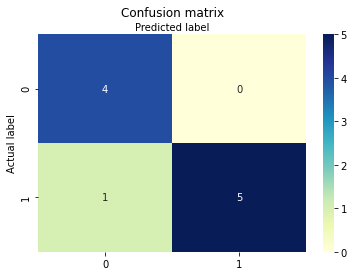

Report:
               precision    recall  f1-score   support

         0.0       0.80      1.00      0.89         4
         1.0       1.00      0.83      0.91         6

    accuracy                           0.90        10
   macro avg       0.90      0.92      0.90        10
weighted avg       0.92      0.90      0.90        10

Accuracy: 0.9 


Accuracy Array: [0.9]
Accuracy Mean: 0.9
Accuracy Population SD: 0.0
Accuracy Sample SD: nan
Accuracy SEM: nan

['court', 'education', 'director', 'held', 'director', 'development', 'party', 'we', 'age', 'turn']


C:\Users\WTP\AppData\Roaming\Python\Python38\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\WTP\AppData\Roaming\Python\Python38\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [41]:
# missing pk & za --> total 10 peaceful and not peaceful countries

# use method pd.DataFrame(df).to_numpy() to convert dataframe to numpy array
df_2010to2020_peace_NoNeut = df_2010to2020_peace.drop(index=['Ghana GH', 'Hong Kong HK', 'India IN', 'Jamaica JM', 'Sri Lanka LK', 'Malaysia MY', 'Philippines PH', 'United States US'])
data = df_2010to2020_peace_NoNeut.drop(['Sum', 'Group Name'], axis=1)
adata = data.to_numpy()
rows,cols=adata.shape
# print("rows:", rows) = 10
# print("cols:", cols) = 1043

# set loop times !!!!!!
loop = 1
accuracy_arr = np.zeros(loop)

# save the most important word here (for every try, 10 words are collected)
important_lst = list()

for x in range(loop):

    print('-------------------------------------------------------')
    print('Try', x+1, '\n')

    #remove row i, train all else, test i
    predict=np.zeros((rows))
    for m in range(rows):
        # np.delete(data, index, axis) return what is left
        adatam1=np.delete(adata, m, 0)
        X_train=np.delete(adatam1, cols-1, 1)
        y_train=adatam1[:,cols-1]
        #print('\nm =',m)
        #Random Forest classifier
        #forest = RandomForestClassifier(criterion='gini',n_estimators=25,random_state=42,n_jobs=2)
        forest = RandomForestClassifier(criterion='gini',n_estimators=25,n_jobs=2)
        forest.fit(X_train, y_train)
        X_test=adata[m,0:cols-1]
        X_test=X_test.reshape(1, -1)
        predict[m]=forest.predict(X_test)
        
        # compute feature importance: EVERY TRYING GENERATES 10 IMPORTANCE-TABLES, HOW DO WE DEAL WITH THAT?
        q=[[0 for x in range(2)] for y in range(cols-1)]
        # print(q)
        importances = forest.feature_importances_
        # print(importances)
        for i in range(cols-1):
            q[i][0]=data.columns[i]
            q[i][1]=importances[i]
        df=pd.DataFrame(q)
        df.columns=['word','importance']
        sort=df.sort_values(by=['importance'],ascending=False)
        print(sort)
        print()
        important_lst.append(sort.iloc[0][0])

    y_test=y_train=adata[:,cols-1]
    y_pred=predict
    
    # df_actu_pred_index = ['Australia AU', 'Bangladesh BD', 'Canada CA', 'United Kingdom GB', 'Ireland IE', 'Kenya KE', 'Nigeria NG', 'New Zealand NZ', 'Pakistan PK', 'Singapore SG', 'Tanzania TZ']
    # print_df_actu_pred(y_test, y_pred, df_actu_pred_index)

    print_simple_confusion_matrx(y_test, y_pred)
    print_pretty_confusion_matrx(y_test, y_pred, [0,1])
    print_curr_pred_report(y_test, y_pred)
        
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy, '\n')
    
    # fill accuracy data in an array
    accuracy_arr[x] = accuracy
          
print_accuracy_report(accuracy_arr)
print()
print(important_lst)

In [42]:
df_all_wrd_styled = df_all_wrd.style.applymap(lambda x: 'background-color : yellow' if x in important_lst else '')

In [43]:
df_all_wrd_styled

,Notpeace,0 Count,Peace,1 Count
0,i,273079.000000,i,1080311
1,state,197326.000000,year,638740
2,nigeria,164717.000000,new,486784
3,government,163651.000000,time,416247
4,people,137769.000000,people,379067
5,country,137002.000000,we,316439
6,year,135913.000000,work,310320
7,he,129753.000000,use,304649
8,we,96322.000000,well,275470
9,president,94390.000000,he,269135


In [44]:
# save all words dataframe as a csv file

df_all_wrd_styled.to_excel('p_n_notp_words.xlsx', engine='openpyxl', index=False) 

# Logistic Regression

In [45]:
hours = [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]
passfail = [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]

In [46]:
logregtest = pd.DataFrame()
logregtest["Hours"] = hours
logregtest["Pass"] = passfail

In [47]:
logregtest

,Hours,Pass
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,1.75,1
7,2.00,0
8,2.25,1
9,2.50,0


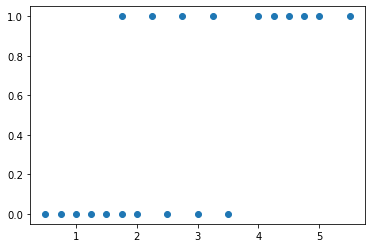

In [48]:
x = logregtest.Hours
y = logregtest.Pass

plt.scatter(x, y)
plt.show()

In [49]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=10000, solver='lbfgs', multi_class='ovr')
#Convert a 1D array to a 2D array in numpy
x = x.values.reshape(-1,1)
#Run Logistic Regression
logreg.fit(x, y)

LogisticRegression(C=10000, multi_class='ovr')

In [50]:
hours = np.arange(0, 10, 0.5)
probabilities= []
for i in hours:
    p_fail, p_pass = logreg.predict_proba([[i]])[0]
    probabilities.append(p_pass)

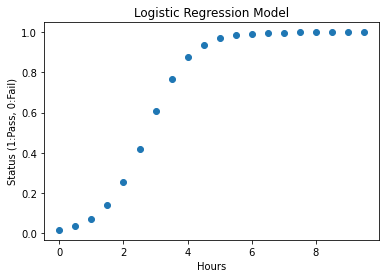

In [51]:
plt.scatter(hours,probabilities)
plt.title("Logistic Regression Model")
plt.xlabel('Hours')
plt.ylabel('Status (1:Pass, 0:Fail)')
plt.show()

In [52]:
logreg.coef_

array([[1.50458575]])

In [53]:
logreg.intercept_

array([-4.07756199])

In [54]:
for i in logreg.coef_:
    for j in i:
        print(j)
        log_co = j

1.5045857465226222


In [55]:
for i in logreg.intercept_:
    print(i)
    log_int = i

-4.077561989266637


In [56]:
from math import exp

In [57]:
print(1 / (1 + exp(-1*log_int + -1*log_co*2)))

0.2557092877664774


In [58]:
(1 / (1 + exp(-1*log_int + -1*log_co* 4)))

0.8744379190824895

# Peaceful and Non-Peaceful Logistic Regression Model

In [59]:
adata.shape

(10, 1043)

In [60]:
data

,201,2011,2012,2013,2014,2015,2016,2017,2018,8217,...,york,you,young,youth,yu,yung,yur,zanzibar,zealand,Group
Countries,,,,,,,,,,,,,,,,,,,,,
Australia AU,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.004023,0.002988,0.000000,0.0,0.0,0.0,0.000000,0.000000,1
Bangladesh BD,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.001831,0.000000,0.0,0.0,0.0,0.000000,0.000000,0
Canada CA,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.004896,0.002926,0.000000,0.0,0.0,0.0,0.000000,0.000000,1
United Kingdom GB,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.004366,0.003369,0.000000,0.0,0.0,0.0,0.000000,0.000000,1
Ireland IE,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.003974,0.003555,0.000000,0.0,0.0,0.0,0.000000,0.000000,1
Kenya KE,0.0,0.0,0.0,0.001871,0.0,0.000000,0.0,0.001846,0.000000,0.0,...,0.0,0.002881,0.002156,0.002401,0.0,0.0,0.0,0.000000,0.000000,0
Nigeria NG,0.0,0.0,0.0,0.000000,0.0,0.001872,0.0,0.000000,0.000000,0.0,...,0.0,0.002894,0.001931,0.002374,0.0,0.0,0.0,0.000000,0.000000,0
New Zealand NZ,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.002554,0.003093,0.000000,0.0,0.0,0.0,0.000000,0.023932,1
Singapore SG,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.002248,0.002187,0.000000,0.0,0.0,0.0,0.000000,0.000000,1


In [61]:
ytrain = data.loc[:,'Group'].values

In [62]:
xtrain = data.drop(columns=['Group']).to_numpy()

In [63]:
model = logreg.fit(xtrain, ytrain)

In [64]:
model.intercept_

array([-0.98581919])

In [65]:
model.coef_

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -2.24288131,  9.22104911]])

In [66]:
df_2010to2020_peace_AllNeut = df_2010to2020_peace.drop(index=['Australia AU', 'Bangladesh BD', 'Canada CA', 'United Kingdom GB', 'Ireland IE', 'Kenya KE', 'Nigeria NG', 'New Zealand NZ', 'Singapore SG', 'Tanzania TZ'])
df_xtest = df_2010to2020_peace_AllNeut.drop(['Sum', 'Group', 'Group Name'], axis=1)

In [67]:
df_xtest

,201,2011,2012,2013,2014,2015,2016,2017,2018,8217,...,yesterday,york,you,young,youth,yu,yung,yur,zanzibar,zealand
Countries,,,,,,,,,,,,,,,,,,,,,
Ghana GH,0.000000,0.000000,0.002321,0.00000,0.000000,0.00000,0.001679,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.002215,0.002599,0.000000,0.000000,0.000000,0.0,0.0
Hong Kong HK,0.002322,0.000000,0.000000,0.00000,0.001454,0.00000,0.000000,0.000000,0.000000,0.003649,...,0.000000,0.000000,0.000000,0.001592,0.000000,0.000000,0.000000,0.000000,0.0,0.0
India IN,0.002097,0.001987,0.002478,0.00174,0.001744,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.002220,0.001865,0.000000,0.000000,0.000000,0.000000,0.0,0.0
Jamaica JM,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.001988,0.003381,0.002224,0.000000,0.000000,0.000000,0.0,0.0
Sri Lanka LK,0.000000,0.000000,0.000000,0.00000,0.000000,0.00168,0.000000,0.001741,0.002131,0.000000,...,0.000000,0.000000,0.001923,0.001877,0.000000,0.000000,0.000000,0.000000,0.0,0.0
Malaysia MY,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.002563,0.000000,0.001918,0.002034,0.000000,0.000000,0.000000,0.000000,0.0,0.0
Philippines PH,0.002849,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.011559,0.001667,0.004618,0.0,0.0
United States US,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.001699,0.005256,0.002841,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [68]:
xtest = df_xtest.to_numpy()

In [69]:
xtest

array([[0.        , 0.        , 0.00232119, ..., 0.        , 0.        ,
        0.        ],
       [0.00232154, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00209725, 0.00198667, 0.00247757, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0028491 , 0.        , 0.        , ..., 0.00461797, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [70]:
prob_pred = model.predict_proba(xtest)

In [71]:
prob_pred

array([[0.81162029, 0.18837971],
       [0.44643878, 0.55356122],
       [0.49483705, 0.50516295],
       [0.45595037, 0.54404963],
       [0.81283262, 0.18716738],
       [0.46410738, 0.53589262],
       [0.36829186, 0.63170814],
       [0.07096301, 0.92903699]])

In [72]:
print('Predictions (probablility to be a peaceful country):')
print('Ghana GH: ', "{:.0%}".format(prob_pred[0][1]))
print('Hong Kong HK: ', "{:.0%}".format(prob_pred[1][1]))
print('India IN: ', "{:.0%}".format(prob_pred[2][1]))
print('Jamaica JM: ', "{:.0%}".format(prob_pred[3][1]))
print('Sri Lanka LK: ', "{:.0%}".format(prob_pred[4][1]))
print('Malaysia MY: ', "{:.0%}".format(prob_pred[5][1]))
print('Philippines PH: ', "{:.0%}".format(prob_pred[6][1]))
print('United States US: ', "{:.0%}".format(prob_pred[7][1]))

Predictions (probablility to be a peaceful country):
Ghana GH:  19%
Hong Kong HK:  55%
India IN:  51%
Jamaica JM:  54%
Sri Lanka LK:  19%
Malaysia MY:  54%
Philippines PH:  63%
United States US:  93%
